Color space conversions
=======================

In this tutorial we are going to learn how to convert image from different image spaces using `kornia.color`.

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

In [2]:
# We use OpenCV to load an image to memory represented in a numpy.array
img_bgr: np.array = cv2.imread('../data/simba.png', cv2.IMREAD_COLOR)

In [3]:
# Convert the numpy array to torch
x_bgr: torch.Tensor = kornia.image_to_tensor(img_bgr)

In [4]:
def hflip(input: torch.Tensor) -> torch.Tensor:
    return torch.flip(input, [-1])


def vflip(input: torch.Tensor) -> torch.Tensor:
    return torch.flip(input, [-2])


def rot180(input: torch.Tensor) -> torch.Tensor:
    return torch.flip(input, [-2, -1])


def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')

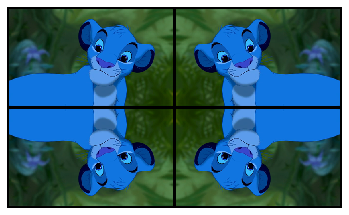

In [5]:
# Create a batch of images
xb_bgr = torch.cat([x_bgr, hflip(x_bgr), vflip(x_bgr), rot180(x_bgr)])
imshow(xb_bgr)

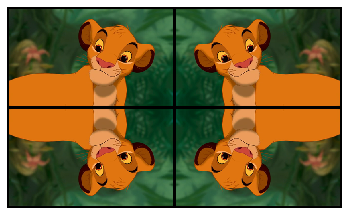

In [6]:
# Convert BGR to RGB
xb_rgb = kornia.bgr_to_rgb(xb_bgr)
imshow(xb_rgb)

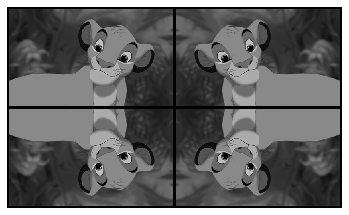

In [7]:
# Convert RGB to grayscale
# NOTE: image comes in torch.uint8, and kornia assumes floating point type
xb_gray = kornia.rgb_to_grayscale(xb_rgb.float() / 255.)
imshow(xb_gray)

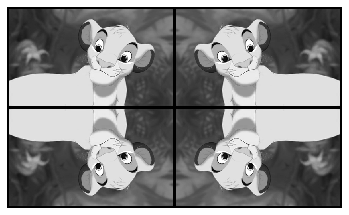

In [8]:
# Convert RGB to HSV
xb_hsv = kornia.rgb_to_hsv(xb_rgb.float() / 255.)
imshow(xb_hsv[:, 2:3])